# About Dataset

Flight Price Prediction Dataset" is a comprehensive collection of data aimed at predicting the prices of airline tickets. This dataset provides a rich source of information for machine learning and data analysis enthusiasts interested in the aviation and travel industry. It includes a wide range of features and variables, such as flight routes, departure and arrival cities, airline carriers, departure and arrival times, ticket class, and more. With this dataset, researchers and data scientists can explore and develop predictive models to estimate airfare prices, helping travelers make informed decisions and airlines optimize their pricing strategies. It's a valuable resource for anyone looking to delve into the world of airfare prediction and travel analyticshttps

![](https://www.airlinesairportsterminal.com/wp-content/uploads/2024/05/Flight-Price-Predictor.jpg)

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error 
sns.set(style = 'whitegrid')

# Reading Data

In [2]:
data = pd.read_csv('/kaggle/input/flight-price-prediction/Data_Train.csv')
Test = pd.read_csv('/kaggle/input/flight-price-prediction/Test_set.csv')

In [3]:
data.shape

(10683, 11)

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


# Hanlding Nulls

In [6]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### we have two values in different columns that are null. Here, we're checking if these two values are in the same row, and if they are, we delete the entire row at once, and that's it.

In [7]:
for index, nan in enumerate(data['Route'].isna().values) : 
    if nan == True : print(index)

9039


In [8]:
for index,nan in enumerate(data['Total_Stops'].isna().values) : 
    if nan == True : print(index)

9039


In [9]:
data.loc[9039,:]

Airline               Air India
Date_of_Journey       6/05/2019
Source                    Delhi
Destination              Cochin
Route                       NaN
Dep_Time                  09:45
Arrival_Time       09:25 07 May
Duration                23h 40m
Total_Stops                 NaN
Additional_Info         No info
Price                      7480
Name: 9039, dtype: object

###  we have a row with two null values in different columns, so we will delete the row to make it better.


In [10]:
data.drop([9039],axis=0,inplace=True)
data.reset_index(inplace=True)

In [11]:
data.head()

,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### In the previous code, the data creates a new column called "index" so we have to delete it.

In [12]:
data.drop(['index'],axis=1,inplace=True)

In [13]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Data Processing

### function that takes a DataFrame as input and prints out unique values for each column.

In [14]:
def show_unique_values(data):
    for column in data.columns:
        unique_values = data[column].unique()
        print(f"Column '{column}' has {len(unique_values)} unique values", "\n")
        print(unique_values)
        print("__________________________________________________________\n")
show_unique_values(data)

Column 'Airline' has 12 unique values 

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
__________________________________________________________

Column 'Date_of_Journey' has 44 unique values 

['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
__________________________________________________________

Column 'Source' has 5 unique valu

### We split "Date_of_Journey" the  column into three columns: "Day_of_Journey", "Month_of_Journey", and "Year_of_Journey".

In [15]:
data["Day_of_Journey"] = data["Date_of_Journey"].apply(lambda day:day.split('/')[0])
data["Month_of_Journey"] = data["Date_of_Journey"].apply(lambda month : month.split('/')[1])
data["Year_of_Journey"] = data["Date_of_Journey"].apply(lambda year : year.split('/')[2])

In [16]:
data["Year_of_Journey"].unique()

array(['2019'], dtype=object)

### We found that all the trip dates are in the same year, so we will delete thate coloumn.

In [17]:
data.drop(["Year_of_Journey"],axis=1,inplace=True)
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [18]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03


In [19]:
data["Day_of_Journey"].unique()

array(['24', '1', '9', '12', '01', '27', '18', '3', '15', '6', '21', '06',
       '09', '03'], dtype=object)

In [20]:
data["Month_of_Journey"].unique()

array(['03', '05', '06', '04'], dtype=object)

### As we can see in the columns Day_of_Journey and Month_of_Journey, the values are of type object, so we need to convert them to integers. 

In [21]:
data['Day_of_Journey'] = data['Day_of_Journey'].astype(int)
data['Month_of_Journey'] = data['Month_of_Journey'].astype(int)

In [22]:
data["Day_of_Journey"].unique()

array([24,  1,  9, 12, 27, 18,  3, 15,  6, 21])

In [23]:
data["Month_of_Journey"].unique()

array([3, 5, 6, 4])

### check is thath any abnormal values in "Dep_Time" coloumn

In [24]:
dep_time = pd.Series([len(time.split()) for time in data["Dep_Time"].tolist()]).value_counts()

In [25]:
print(dep_time)

1    10682
Name: count, dtype: int64


In [26]:
data['AccurateArrivalTime'] = data['Arrival_Time'].apply(lambda x : x.split()[0])

In [27]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,AccurateArrivalTime
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,01:10
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25


In [28]:
data.shape

(10682, 14)

### We are checking if the " : " is present in the time for all rows or not, to ensure that we have extracted the time correctly from the "AccurateArrivalTime" column and that there is no incorrect information, such as a date of the month or day."

In [29]:
counter = pd.Series(len(sign.split(":")) for sign in data["AccurateArrivalTime"].tolist()).value_counts()

In [30]:
print(counter)

2    10682
Name: count, dtype: int64


In [31]:
counte = pd.Series(len(sign.split()) for sign in data["Arrival_Time"].tolist()).value_counts()

In [32]:
print(counte)

1    6348
3    4334
Name: count, dtype: int64


In [33]:
def GetArriveDate(TripDate):
    date = TripDate.split()
    if len(date) == 1:
        return "None" 
    elif len(date) == 3:
        day = date[1]
        month = date[2]
        return day, month

In [34]:
data[['AccurateArrivalDay', 'AccurateArrivalMonth']] = data['Arrival_Time'].apply(lambda x: pd.Series(GetArriveDate(x)))

In [35]:
data["AccurateArrivalDay"].unique()

array(['22', 'None', '10', '13', '02', '04', '28', '19', '07', '16', '25',
       '20', '23', '11', '03', '08', '05', '26', '29', '17'], dtype=object)

In [36]:
data["AccurateArrivalMonth"].unique()

array(['Mar', nan, 'Jun', 'May', 'Apr'], dtype=object)

In [37]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,01:10,22,Mar
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15,None,NaN


### We check the difference between the departure date and the arrival date. If the departure is on the 15th of the month and the arrival is on the 16th, then everything is fine, and there's no issue. However, if it's the other way around, then there is definitely an error in our data.

In [38]:
def FindWrongData(DepDay,ArrivalDay) : 
    if ArrivalDay != 'None' : 
        if int(ArrivalDay) < int(DepDay) : 
            return True
        else : 
            return False
    else : 
        return False
    
data["DayDifference"] = data.apply(lambda x : FindWrongData(x.Day_of_Journey, x.AccurateArrivalDay), axis =1)

In [39]:
data['DayDifference'].value_counts()

DayDifference
False    10593
True        89
Name: count, dtype: int64

In [40]:
WrongIndices = data[data['DayDifference']==True].index
WrongIndices

Index([    0,    21,   110,   379,   605,   628,  1115,  1268,  1318,  1354,
        1478,  1538,  1721,  2010,  2089,  2095,  2108,  2353,  2364,  2537,
        2568,  2588,  2618,  3170,  3247,  3301,  3639,  3836,  3913,  4053,
        4120,  4428,  4476,  4615,  4624,  4723,  4764,  4839,  4913,  4948,
        4953,  5067,  5130,  5133,  5214,  5419,  5464,  5545,  5591,  5803,
        5814,  6154,  6173,  6239,  6436,  6494,  6677,  7146,  7337,  7507,
        7527,  7584,  7612,  7738,  8000,  8068,  8182,  8603,  8934,  9197,
        9320,  9452,  9514,  9555,  9688,  9843,  9929, 10003, 10120, 10150,
       10244, 10323, 10342, 10367, 10440, 10488, 10589, 10637, 10659],
      dtype='int64')

### Let's assume that the departure date was the 30th of the month and the arrival date was the 1st of the following month. In this case, everything is fine, but the code won't understand that this is correct. So, we just double-check because the plane's arrival date shouldn't be before the departure date.

In [41]:
# data.loc[WrongIndices,['MonthOfJourney','AccurateArrivalMonth']]['MonthOfJourney'].unique()

In [42]:
# data.loc[WrongIndices'''Row''',['MonthOfJourney','AccurateArrivalMonth']'''coloumns''']['AccurateArrivalMonth  ''''specific task after filtering''' ].unique()

In [43]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'AccurateArrivalTime', 'AccurateArrivalDay', 'AccurateArrivalMonth',
       'DayDifference'],
      dtype='object')

In [44]:
MonthsDict  = {3:'Mar',4:'Apr'}
for a,b in zip(data.loc[WrongIndices,['Month_of_Journey','AccurateArrivalMonth']]['Month_of_Journey'].tolist(),
               data.loc[WrongIndices,['Month_of_Journey','AccurateArrivalMonth']]['AccurateArrivalMonth'].tolist()) : 
    if MonthsDict[a] != b : 
        print(a)

### Here, the code didn't print anything, so we are fine, and there's nothing wrong with our data.

In [45]:
data.drop(data[data['DayDifference']==True].index,axis=0,inplace=True)
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [46]:
PartOfData = data[data['AccurateArrivalDay']!='None']
Differences = []
for a,b in zip(PartOfData['Day_of_Journey'].tolist(),PartOfData['AccurateArrivalDay'].tolist()) : 
    Differences.append(int(b) - int(a))
set(Differences)

{1, 2, 4}

In [47]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth,DayDifference
0,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15,None,NaN,False
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25,10,Jun,False


### we compare the departure date with the arrival date and find that the difference between them is four days, this is considered a significant error, and we need to remove those values.

In [48]:
def GetDiff(ArrivalDay, Depday):
    if ArrivalDay != "None":
        
        if int(ArrivalDay) - int(Depday) == 4:
            return True
        else :
            return False
    else :
        return False

data['Big Diff'] = data.apply(lambda x : GetDiff(x.AccurateArrivalDay,x.Day_of_Journey),axis=1)    

In [49]:
data.drop(data[data['Big Diff']==True].index,axis=0,inplace=True)
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)


In [50]:
data['Big Diff'].value_counts()

Big Diff
False    10541
Name: count, dtype: int64

In [51]:
pd.Series([len(i.split()) for i in data['Duration'].tolist()]).value_counts()

2    9522
1    1019
Name: count, dtype: int64

### In the "duration" column, we check whether each flight time value contains both hours and minutes, only hours, only minutes, or if it contains "None" values (Not hours, Not minutes).

In [52]:
BothHM,HAlone,MAlone,NoHM =0,0,0,0
for i in data['Duration'].tolist() : 
    if 'h' in i and 'm' in i : 
        BothHM+= 1 
    elif 'h' in i and not 'm' in i : 
        HAlone+=1
    elif not 'h' in i and  'm' in i : 
        MAlone+=1
    else : 
        NoHM  +=1
        
BothHM,HAlone,MAlone,NoHM     

(9522, 1018, 1, 0)

### We found value that contains minutes and we need to check it

In [53]:
for index, value in enumerate(data['Duration'].tolist()) : 
    if 'h' not in value and 'm' in value : 
        print(index)

6389


In [54]:
data.loc[6389, :]

Airline                             Air India
Date_of_Journey                     6/03/2019
Source                                 Mumbai
Destination                         Hyderabad
Route                   BOM ? GOI ? PNQ ? HYD
Dep_Time                                16:50
Arrival_Time                            16:55
Duration                                   5m
Total_Stops                           2 stops
Additional_Info                       No info
Price                                   17327
Day_of_Journey                              6
Month_of_Journey                            3
AccurateArrivalTime                     16:55
AccurateArrivalDay                       None
AccurateArrivalMonth                      NaN
DayDifference                           False
Big Diff                                False
Name: 6389, dtype: object

### We found that this value only contains five minutes for the flight duration and has four layovers, so we will remove this value. 

In [55]:
data.drop([6389],axis = 0 , inplace=True)
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

### convert all time to minutes

In [56]:
def DurationTime(n) : 
    if 'm' in n : 
        H = n.split()[0]
        H = H.strip('h')
        
        M = n.split()[1]
        M = M.strip('m')
        return (int(H)*60) + int(M)
    else : 
        H = n.strip('h')
        return int(H)*60
        
data['DurationInMinutes']= data['Duration'].apply(lambda x : DurationTime(x))


In [57]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8254
In-flight meal not included     1930
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [58]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8254
In-flight meal not included     1930
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [59]:
data['MealIncluded'] = data['Additional_Info'].apply(lambda x : 1 if x != 'In-flight meal not included' else 0)
data['MealIncluded'].value_counts()

MealIncluded
1    8610
0    1930
Name: count, dtype: int64

In [60]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalMonth,DayDifference,Big Diff,DurationInMinutes,MealIncluded
0,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15,None,NaN,False,False,445,1
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25,10,Jun,False,False,1140,1


In [61]:
def DayPart(n) : 
    H = int(n.split(':')[0])
    if H < 6 : 
        return 'Early Morning'
    elif 6<=H < 12 : 
        return 'Morning'
    elif  12<=H < 15 : 
        return 'Noon'
    elif  15<=H < 19 : 
        return 'Evening'
    else : 
        return 'Night'
    
data['DepartureDayPart']   = data['Dep_Time'].apply(lambda x : DayPart(x))
data['ArrivalDayPart']   = data['AccurateArrivalTime'].apply(lambda x : DayPart(x))
data[['Dep_Time','DepartureDayPart','AccurateArrivalTime','ArrivalDayPart']]

,Dep_Time,DepartureDayPart,AccurateArrivalTime,ArrivalDayPart
0,05:50,Early Morning,13:15,Noon
1,09:25,Morning,04:25,Early Morning
2,18:05,Evening,23:30,Night
3,16:50,Evening,21:35,Night
4,09:00,Morning,11:25,Morning
...,...,...,...,...
10535,19:55,Night,22:25,Night
10536,20:45,Night,23:20,Night
10537,08:20,Morning,11:20,Morning
10538,11:30,Morning,14:10,Noon


In [62]:
def FlightLength(H) : 
    if H < 180 : 
        return 'Short'
    elif 180<=H < 600 : 
        return 'Medium'
    else : 
        return 'Long'
    
data['FlightLength']   = data['DurationInMinutes'].apply(lambda x : FlightLength(x))
data[['DurationInMinutes','FlightLength']]

,DurationInMinutes,FlightLength
0,445,Medium
1,1140,Long
2,325,Medium
3,285,Medium
4,145,Short
...,...,...
10535,150,Short
10536,155,Short
10537,180,Medium
10538,160,Short


In [63]:
data['Price'].min(),data['Price'].max()

(1759, 79512)

In [64]:
def PriceRange(H) : 
    if H < 5000 : 
        return 'Cheap'
    elif 5000<=H < 10000 : 
        return 'Medium'
    else : 
        return 'Expensive'
    
data['PriceRange']   = data['Price'].apply(lambda x : PriceRange(x))
data[['Price','PriceRange']]

,Price,PriceRange
0,7662,Medium
1,13882,Expensive
2,6218,Medium
3,13302,Expensive
4,3873,Cheap
...,...,...
10535,4107,Cheap
10536,4145,Cheap
10537,7229,Medium
10538,12648,Expensive


In [65]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,AccurateArrivalDay,AccurateArrivalMonth,DayDifference,Big Diff,DurationInMinutes,MealIncluded,DepartureDayPart,ArrivalDayPart,FlightLength,PriceRange
0,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,...,None,NaN,False,False,445,1,Early Morning,Noon,Medium,Medium


# Data Visualization 

In [66]:
def CPlot(feature) : 
    global data
    fig,ax = plt.subplots(figsize = (10,6))
    sns.countplot(x = feature,data=data,facecolor = (0,0,0,0),linewidth = 5,
                  edgecolor= sns.color_palette('dark',3))
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
    return None

def KPlot(feature) : 
    global data
    fig,ax = plt.subplots(figsize = (10,6))
    sns.kdeplot(data[feature],shade=True)
    return None

def Pie(feature,limit=20) : 
    global data
    fig,ax = plt.subplots(figsize = (10,6))
    plt.pie(data[feature].value_counts()[:limit],labels = list(data[feature].value_counts()[:limit].index),
            autopct = '%1.2f%%',labeldistance= 1.1)
    return None
   
    

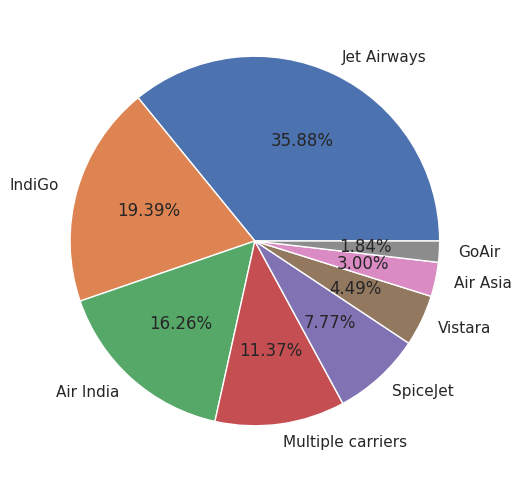

In [67]:
Pie('Airline',8)

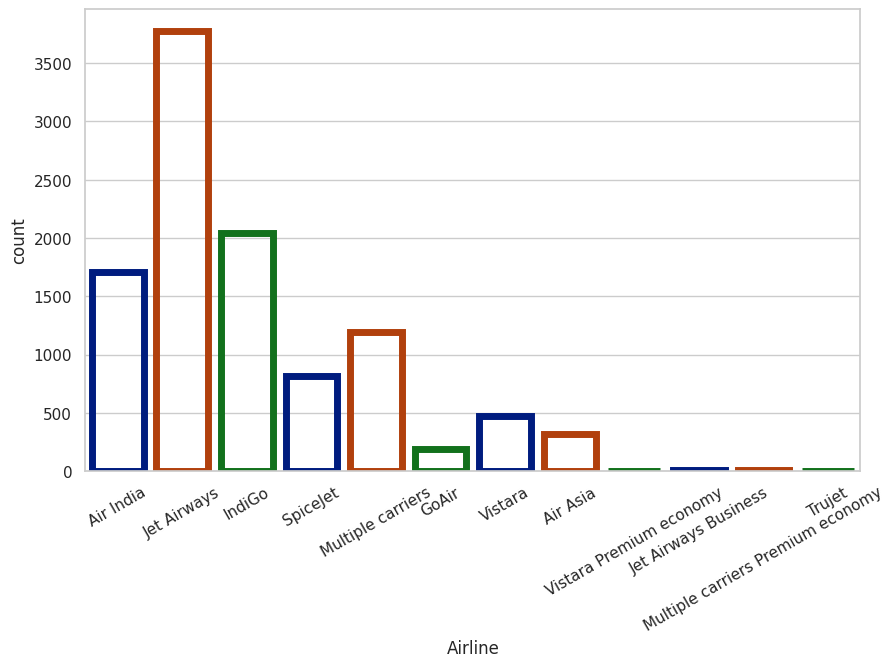

In [68]:
CPlot('Airline')

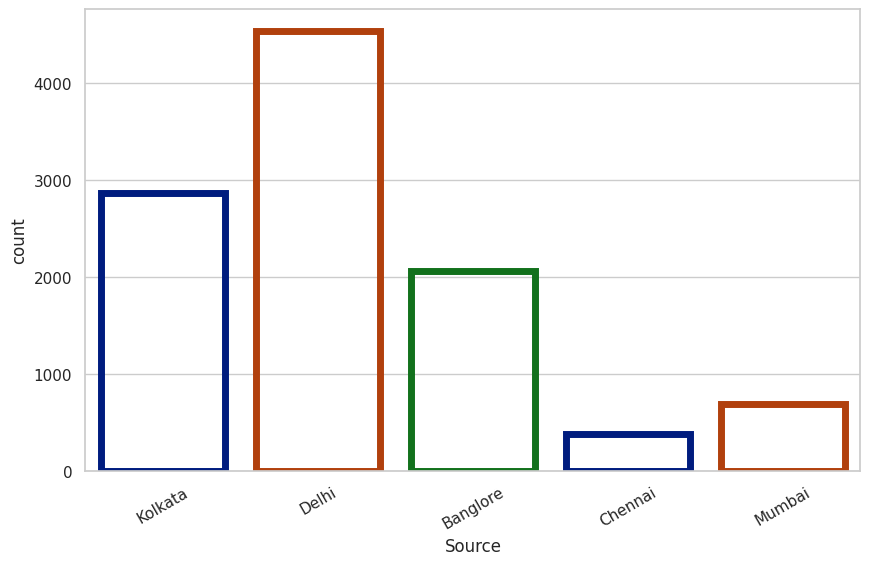

In [69]:
CPlot('Source')

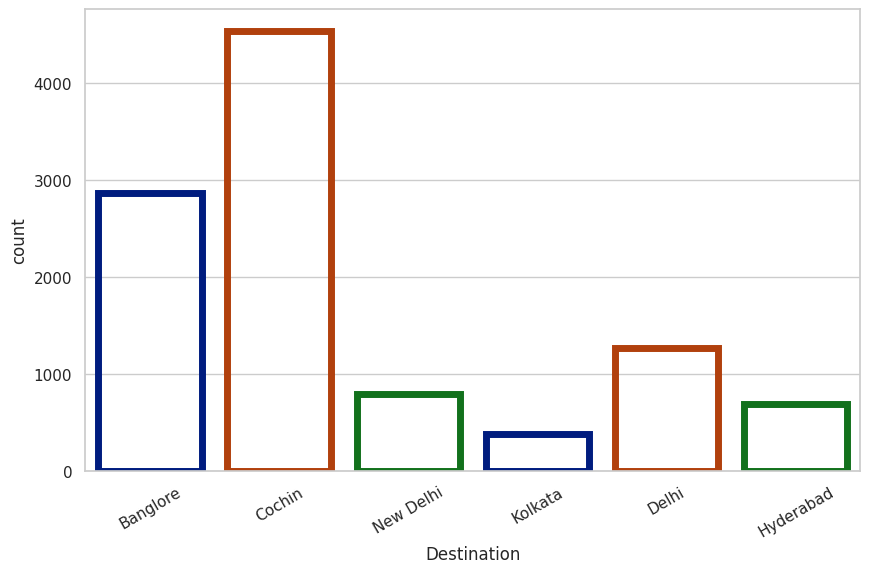

In [70]:
CPlot('Destination')

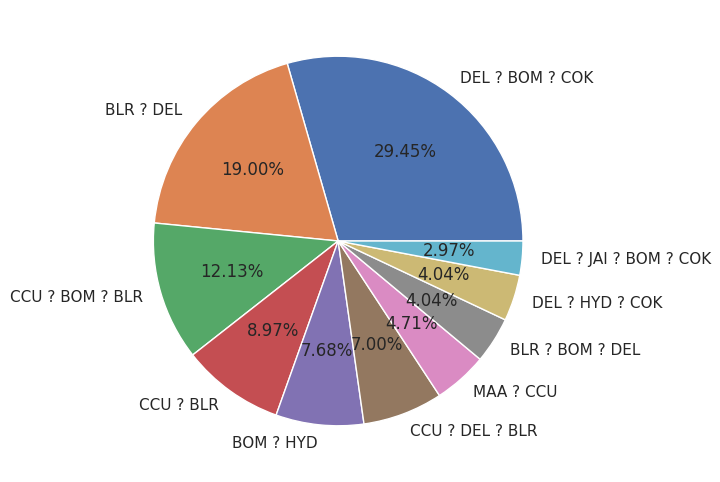

In [71]:
Pie('Route',10)

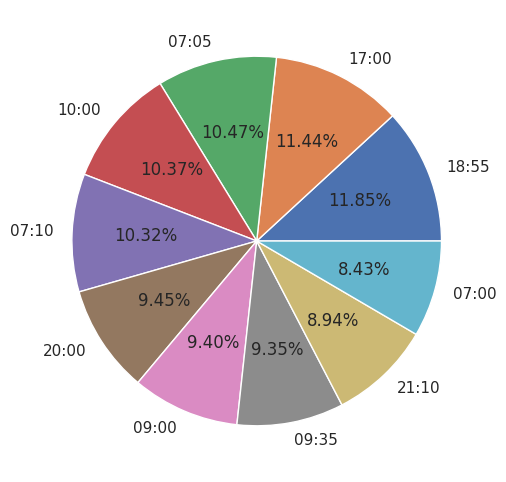

In [72]:
Pie('Dep_Time',10)

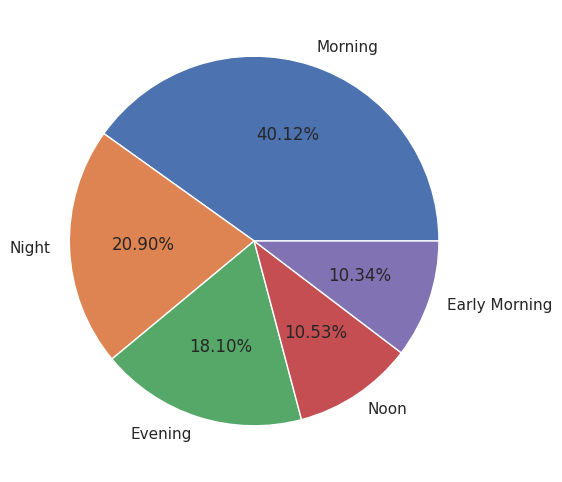

In [73]:
Pie('DepartureDayPart')

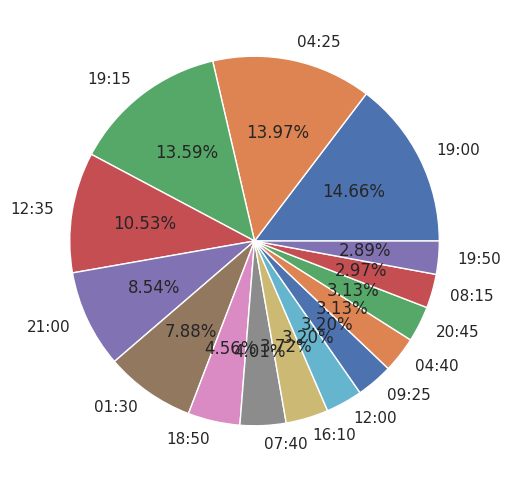

In [74]:
Pie('AccurateArrivalTime',15)

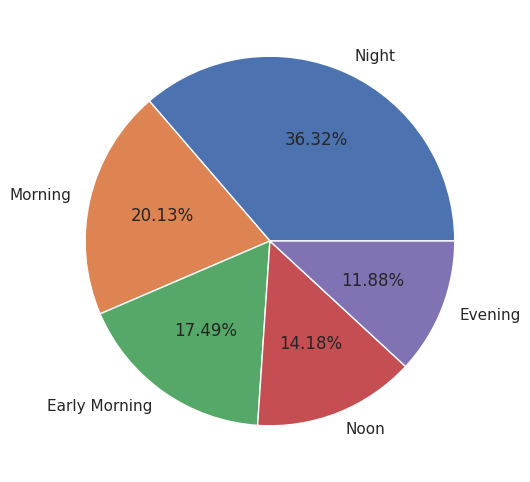

In [75]:
Pie('ArrivalDayPart')

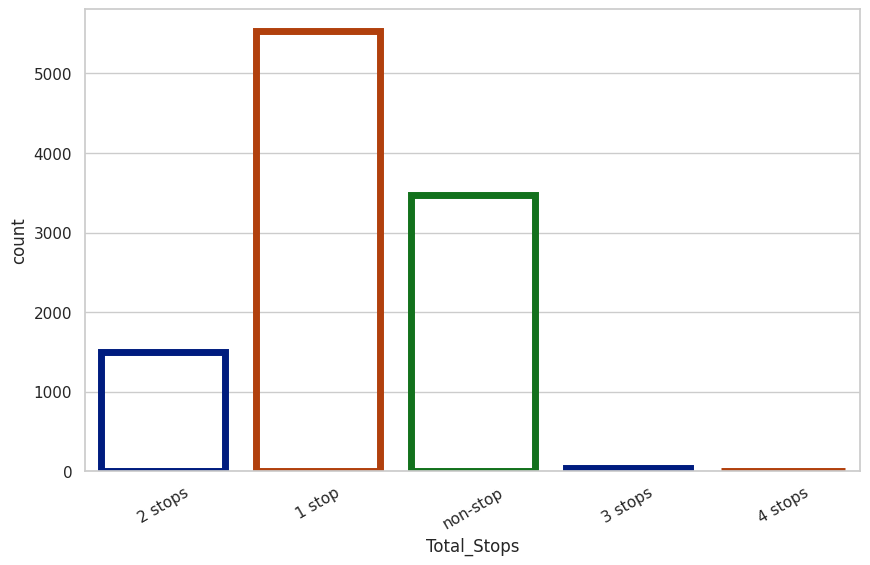

In [76]:
CPlot('Total_Stops')

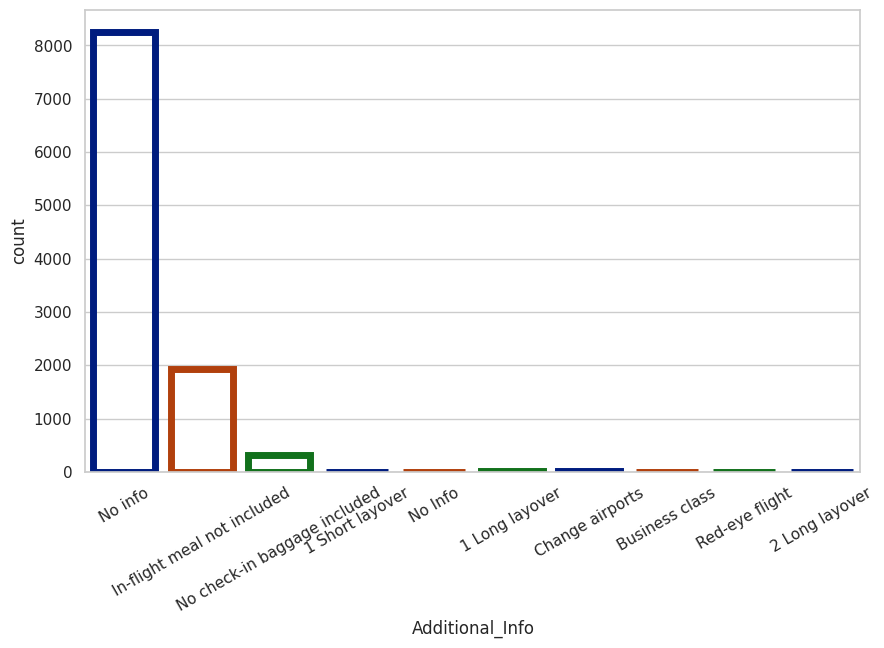

In [77]:
CPlot('Additional_Info')

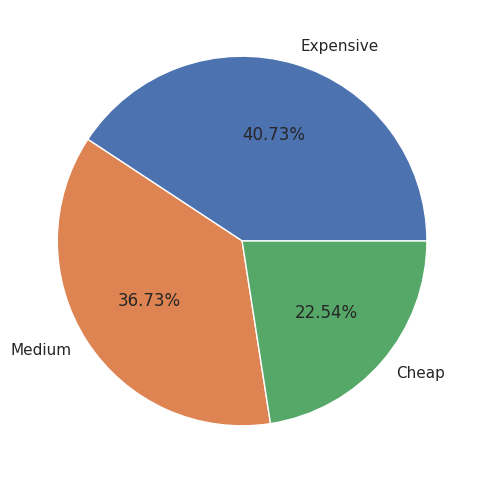

In [78]:
Pie('PriceRange')

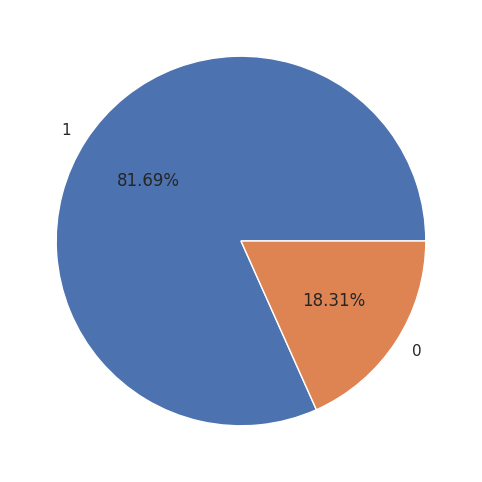

In [79]:
Pie('MealIncluded')

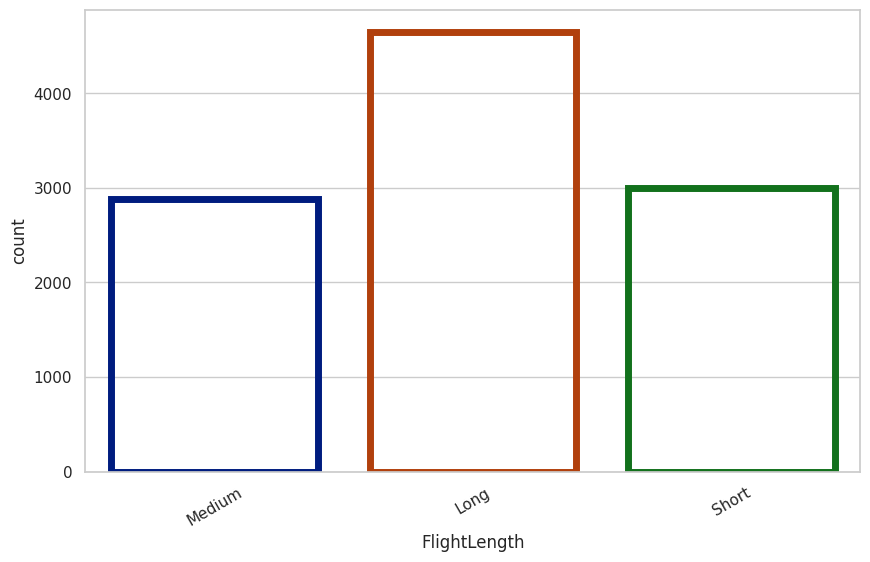

In [80]:
CPlot('FlightLength')

# Data Preparing 

In [81]:
AirLineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepDayEnc,ArrivDayEnc,FlightLengthEnc = LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder()

In [82]:
def ApplyEncoder(Encoder,OriginalColumn) : 
    global data
    Encoder.fit(data[OriginalColumn])
    return Encoder.transform(data[OriginalColumn])

In [83]:
data['AirLineEnc'] = ApplyEncoder(AirLineEnc,'Airline')
data['SourceEnc'] = ApplyEncoder(SourceEnc,'Source')
data['DestinationEnc'] = ApplyEncoder(DestinationEnc,'Destination')
data['AdditionalInfoEnc'] = ApplyEncoder(AdditionalInfoEnc,'Additional_Info')
data['MealIncludedEnc'] = ApplyEncoder(MealIncludedEnc,'MealIncluded')
data['DepDayEnc'] = ApplyEncoder(DepDayEnc,'DepartureDayPart')
data['ArrivDayEnc'] = ApplyEncoder(ArrivDayEnc,'ArrivalDayPart')
data['FlightLengthEnc'] = ApplyEncoder(FlightLengthEnc,'FlightLength')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,FlightLength,PriceRange,AirLineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepDayEnc,ArrivDayEnc,FlightLengthEnc
0,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,...,Medium,Medium,1,3,0,8,1,0,4,1
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,Long,Expensive,4,2,1,8,1,2,0,0
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,...,Medium,Medium,3,3,0,8,1,1,3,1
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,...,Medium,Expensive,3,0,5,8,1,1,3,1
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,...,Short,Cheap,8,3,0,8,1,2,2,2


In [84]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'AccurateArrivalTime', 'AccurateArrivalDay', 'AccurateArrivalMonth',
       'DayDifference', 'Big Diff', 'DurationInMinutes', 'MealIncluded',
       'DepartureDayPart', 'ArrivalDayPart', 'FlightLength', 'PriceRange',
       'AirLineEnc', 'SourceEnc', 'DestinationEnc', 'AdditionalInfoEnc',
       'MealIncludedEnc', 'DepDayEnc', 'ArrivDayEnc', 'FlightLengthEnc'],
      dtype='object')

In [85]:
ColumnsToInt = ['Day_of_Journey','Month_of_Journey','DurationInMinutes',]

for col in ColumnsToInt : 
    data[col] = data[col].astype(int)
data.head()    

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,FlightLength,PriceRange,AirLineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepDayEnc,ArrivDayEnc,FlightLengthEnc
0,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,...,Medium,Medium,1,3,0,8,1,0,4,1
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,Long,Expensive,4,2,1,8,1,2,0,0
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,...,Medium,Medium,3,3,0,8,1,1,3,1
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,...,Medium,Expensive,3,0,5,8,1,1,3,1
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,...,Short,Cheap,8,3,0,8,1,2,2,2


# Splitting out data for machine learning algorithms

In [86]:
X = data[['Day_of_Journey', 'Month_of_Journey','DurationInMinutes', 'AirLineEnc', 'SourceEnc',
       'DestinationEnc', 'AdditionalInfoEnc', 'MealIncludedEnc', 'DepDayEnc',
       'ArrivDayEnc', 'FlightLengthEnc']]

y = data['Price']

In [87]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25,shuffle = True , random_state = 44)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7905, 11), (2635, 11), (7905,), (2635,))

# Building Machine learning Models for Regression Problem

In [88]:
LinearRegressionModel = LinearRegression(fit_intercept=True,copy_X=True,n_jobs=-1)
SGDRegressionModel = SGDRegressor(alpha=0.1,random_state=33,penalty='l2',loss = 'huber')
LassoRegressionModel = Lasso(alpha=1.0,random_state=33)
RidgeRegressionModel = Ridge(alpha=1.0,random_state=33)
RandomForestRegressorModel = RandomForestRegressor(n_estimators=1000,max_depth=8, random_state=33)
GBRModel = GradientBoostingRegressor(n_estimators=500,max_depth=7,learning_rate = 1.5 ,random_state=33)
SVRModel = SVR(C = 1.0 ,epsilon=0.1,kernel = 'rbf') 
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=3,random_state=33)
KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = 5, weights='uniform',algorithm = 'auto')    


Models = [LinearRegressionModel,SGDRegressionModel,LassoRegressionModel,RidgeRegressionModel,RandomForestRegressorModel,
          GBRModel,SVRModel,DecisionTreeRegressorModel,KNeighborsRegressorModel]


In [89]:
for Model in Models : 
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(X_train, y_train)
    print(f'Train Score is : {Model.score(X_train, y_train)}')
    print(f'Test Score is : {Model.score(X_test, y_test)}')
    y_pred = Model.predict(X_test)
    print(f'MAE value is  : {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE value is  : {mean_squared_error(y_test, y_pred)}')
    print(f'MdSE value is  : {median_absolute_error(y_test, y_pred)}')
    print('=================================================')


for Model LinearRegression
Train Score is : 0.41298615962434093
Test Score is : 0.4436061520236131
MAE value is  : 2428.5539340254104
MSE value is  : 10367440.372711973
MdSE value is  : 1980.3871456467132
for Model SGDRegressor
Train Score is : -0.386292446515603
Test Score is : -0.42001422064874716
MAE value is  : 4071.4419474054052
MSE value is  : 26459517.50639008
MdSE value is  : 3134.943585939798
for Model Lasso
Train Score is : 0.4129813960449725
Test Score is : 0.4436791636322268
MAE value is  : 2428.519297443844
MSE value is  : 10366079.92722615
MdSE value is  : 1983.2468729283719
for Model Ridge
Train Score is : 0.41298539019230807
Test Score is : 0.4436312452249447
MAE value is  : 2428.6019074863857
MSE value is  : 10366972.804155074
MdSE value is  : 1981.6947975699004
for Model RandomForestRegressor
Train Score is : 0.8715000405127287
Test Score is : 0.819495600929469
MAE value is  : 1157.491308539386
MSE value is  : 3363388.364522959
MdSE value is  : 714.182477784112
for Mo